## **Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Reading the files**

In [2]:
train_data = pd.read_csv('train.csv', index_col = 'PassengerId')
test_data = pd.read_csv('test.csv', index_col = 'PassengerId')

## **Shape of the dataset**

In [3]:
print("The shape of the dataset is: {} rows and {} columns".format(train_data.shape[0], train_data.shape[1]))

The shape of the dataset is: 891 rows and 11 columns


## **Quick view of data**

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The meaning of each attribute is the following:

**PassengerId**: the ID given to each passenger<br>
**Survived**: the target attribute (1 for passengers who survived, 0 for those who didn't)<br>
**Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd class)<br>
**Name, Sex, Age**: Name of the person, Gender of the person, Age of the person<br>
**SibSp**: Number of siblings & spouses aboard the Titanic<br>
**Parch**: Number of parents & children aboard the Titanic<br>
**Ticket**: Ticket number<br>
**Fare**: Passenger fare (in pounds)<br>
**Cabin**: Passenger's cabin number<br>
**Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Exploratory Data Analysis (EDA)

For **Numerical Columns**

In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Things To Note:-**<br>
1) **Age** has **null** values.<br>
2) Only **38** percent of people **survived**.<br>
3) **Mean** and **Median** of the **Age** is approx **30** and **28**.<br>
4) **Mean Fare** is about **32.2 euros**.<br>
5) **Minimum Age** is **0.42 years** and **Maximum Age** is **80 years**.<br> 
#### **NOTE:-** These all attributes have different scales

## Showing that the numerical columns have different scales

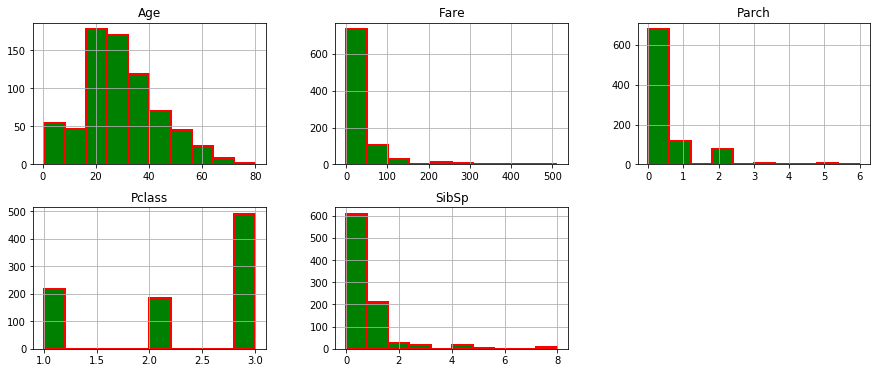

In [6]:
numerical_attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
train_data[numerical_attributes].hist(figsize = (15, 6), color = 'green', edgecolor = 'red', linewidth = 2, layout = (2, 3));

**Things to note down:-**<br>
1) Dividing the age in two categories young where **age<40** and old where **age>40**.<br>
2) **Approx 700** people had paid **less paid**.<br>
3) **More than 600** people has **no parent** on board and **no sibling** on board.<br>
4) **Approx 500** people has 3rd ticket class.<br>

In [7]:
train_data.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Newell, Mr. Arthur Webster",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


It is telling **How many non-null values** are there and **What is the Datatype**

## **Calculating the missing values.**

In [9]:
missing_values = train_data.isnull().sum().sort_values(ascending = False)
print(missing_values)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64


In [10]:
percent_missing = ((train_data.isnull().sum() / train_data.shape[0]) * 100).sort_values(ascending = False)
print(percent_missing)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
Fare         0.000000
Ticket       0.000000
Parch        0.000000
SibSp        0.000000
Sex          0.000000
Name         0.000000
Pclass       0.000000
Survived     0.000000
dtype: float64


In [11]:
missing_data = pd.concat([missing_values, percent_missing], axis = 1, keys = ['Counts', '%'])
missing_data

,Counts,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


## **Displaying the percentage of missing values**

In [12]:
display(missing_data.style.background_gradient(cmap = 'Greens', axis = 0))

,Counts,%
Cabin,687,77.1044
Age,177,19.8653
Embarked,2,0.224467
Fare,0,0
Ticket,0,0
Parch,0,0
SibSp,0,0
Sex,0,0
Name,0,0
Pclass,0,0


### Data Visualization

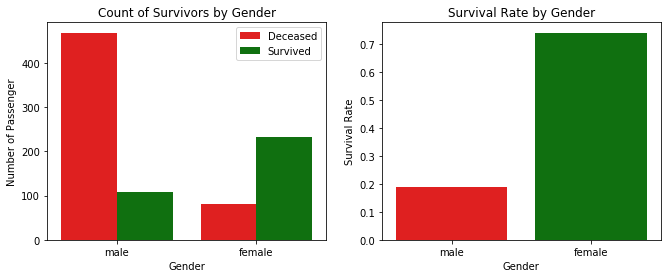

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 4))

sns.countplot(x = 'Sex', hue = 'Survived', data = train_data,  palette = ['red', 'green'], ax = ax1) 
ax1.set_title('Count of Survivors by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Passenger')
ax1.legend(labels = ['Deceased', 'Survived']);

sns.barplot(x = 'Sex', y = 'Survived', data = train_data,  palette = ['red', 'green'], ci = None, ax = ax2)
ax2.set_title('Survival Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Survival Rate');